Numerical Methods using Python (scipy)
======================================

Overview
--------

The core Python language (including the standard libraries) provide enough functionality to carry out computational research tasks. However, there are dedicated (third-party) Python libraries that provide extended functionality which

-   provide numerical tools for frequently occurring tasks

-   which are convenient to use

-   and are more efficient in terms of CPU time and memory requirements than using the code Python functionality alone.

We list three such modules in particular:

-   The `numpy` module provides a data type specialised for “number crunching” of vectors and matrices (this is the `array` type provided by “`numpy`” as introduced in [14-numpy.ipynb](14-numpy.ipynb)), and linear algebra tools.

-   The `matplotlib` package (also knows as `pylab`) provides plotting and visualisation capabilities (see [15-visualising-data.ipynb](15-visualising-data.ipynb)) and the

-   `scipy` package (SCIentific PYthon) which provides a multitude of numerical algorithms and which is introduced in this chapter.

Many of the numerical algorithms available through `scipy` and `numpy` are provided by established compiled libraries which are often written in Fortran or C. They will thus execute much faster than pure Python code (which is interpreted). As a rule of thumb, we expect compiled code to be two orders of magnitude faster than pure Python code.

You can use the help function for each numerical method to find out more about the source of the implementation.

SciPy
-----

`Scipy` is built on `numpy`. All functionality from `numpy` seems to be available in `scipy` as well. For example, instead of

In [1]:
import numpy
x = numpy.arange(0, 10, 0.1)
y = numpy.sin(x)

we can therefor also use

In [2]:
import scipy as s
x = s.arange(0, 10, 0.1)
y = s.sin(x)

First we need to import `scipy`:

In [3]:
import scipy

The `scipy` package provides information about its own structure when we use the help command:

```python
help(scipy)
```

The output is very long, so we're showing just a part of it here:

    stats       --- Statistical Functions [*]
    sparse      --- Sparse matrix [*]
    lib         --- Python wrappers to external libraries [*]
    linalg      --- Linear algebra routines [*]
    signal      --- Signal Processing Tools [*]
    misc        --- Various utilities that don't have another home.
    interpolate --- Interpolation Tools [*]
    optimize    --- Optimization Tools [*]
    cluster     --- Vector Quantization / Kmeans [*]
    fftpack     --- Discrete Fourier Transform algorithms [*]
    io          --- Data input and output [*]
    integrate   --- Integration routines [*]
    lib.lapack  --- Wrappers to LAPACK library [*]
    special     --- Special Functions [*]
    lib.blas    --- Wrappers to BLAS library [*]
      [*] - using a package requires explicit import (see pkgload)

If we are looking for an algorithm to integrate a function, we might explore the `integrate` package:

```python
import scipy.integrate

scipy.integrate?
```

produces:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Integrators of ODE systems
==========================

.. autosummary::
   :toctree: generated/

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.
   complex_ode   -- Convert a complex-valued ODE to real-valued and integrate.
```

The following sections show examples which demonstrate how to employ the algorithms provided by `scipy`.

Numerical integration
---------------------

Scientific Python provides a number of integration routines. A general purpose tool to solve integrals *I* of the kind

$$I=\int_a^b f(x) \mathrm{d} x$$

is provided by the `quad()` function of the `scipy.integrate` module.

It takes as input arguments the function *f*(*x*) to be integrated (the “integrand”), and the lower and upper limits *a* and *b*. It returns two values (in a tuple): the first one is the computed results and the second one is an estimation of the numerical error of that result.

Here is an example: which produces this output:

In [4]:
# NBVAL_IGNORE_OUTPUT
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 17.864264 (+-1.55117e-11)


Note that `quad()` takes optional parameters `epsabs` and `epsrel` to increase or decrease the accuracy of its computation. (Use `help(quad)` to learn more.) The default values are `epsabs=1.5e-8` and `epsrel=1.5e-8`. For the next exercise, the default values are sufficient.

### Exercise: integrate a function

1.  Using scipy’s `quad` function, write a program that solves the following integral numerically: $I = \int
_0^1\cos(2\pi x) dx$.

2.  Find the analytical integral and compare it with the numerical solution.

3.  Why is it important to have an estimate of the accuracy (or the error) of the numerical integral?

### Exercise: plot before you integrate

It is good practice to plot the integrand function to check whether it is “well behaved” before you attempt to integrate. Singularities (i.e. $x$ values where the $f(x)$ tends towards minus or plus infinity) or other irregular behaviour (such as $f(x)=\sin(\frac{1}{x}$) close to $x = 0$ are difficult to handle numerically.

1.  Write a function with name `plotquad` which takes the same arguments as the quad command (*i.e.* $f$, $a$ and $b$) and which 
- (i) creates a plot of the integrand $f(x)$ and 
- (ii) computes the integral numerically using the `quad` function. The return values should be as for the `quad` function.

Solving ordinary differential equations
---------------------------------------

To solve an ordinary differential equation of the type
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t)$$

with a given $y(t_0)=y_0$, we can use `scipy`’s `odeint` function. Here is a (self explaining) example program (`useodeint.py`) to find 

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
 given this differential equation:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

Text(0, 0.5, 'y(t)')

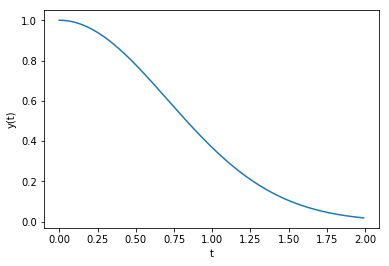

In [5]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as N

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = N.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)

import pylab          # plotting of results
pylab.plot(t, y)
pylab.xlabel('t'); pylab.ylabel('y(t)')

The `odeint` command takes a number of optional parameters to change the default error tolerance of the integration (and to trigger the production of extra debugging output). Use the help command to explore these:


```python
help(scipy.integrate.odeint)
```

will show:

```
Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to function.
    Dfun : callable(y, t0, ...)
        Gradient (Jacobian) of `func`.
    col_deriv : bool, optional
        True if `Dfun` defines derivatives down columns (faster),
        otherwise `Dfun` should define derivatives across rows.
    full_output : bool, optional
        True if to return a dictionary of optional outputs as the second output
    printmessg : bool, optional
        Whether to print the convergence message
    
    Returns
    -------
    y : array, shape (len(t), len(y0))
        Array containing the value of y for each desired time in t,
        with the initial value `y0` in the first row.
    infodict : dict, only returned if full_output == True
        Dictionary containing additional output information
    
        =======  ============================================================
        key      meaning
        =======  ============================================================
        'hu'     vector of step sizes successfully used for each time step.
        'tcur'   vector with the value of t reached for each time step.
                 (will always be at least as large as the input times).
        'tolsf'  vector of tolerance scale factors, greater than 1.0,
                 computed when a request for too much accuracy was detected.
        'tsw'    value of t at the time of the last method switch
                 (given for each time step)
        'nst'    cumulative number of time steps
        'nfe'    cumulative number of function evaluations for each time step
        'nje'    cumulative number of jacobian evaluations for each time step
        'nqu'    a vector of method orders for each successful step.
        'imxer'  index of the component of largest magnitude in the
                 weighted local error vector (e / ewt) on an error return, -1
                 otherwise.
        'lenrw'  the length of the double work array required.
        'leniw'  the length of integer work array required.
        'mused'  a vector of method indicators for each successful time step:
                 1: adams (nonstiff), 2: bdf (stiff)
        =======  ============================================================
    
    Other Parameters
    ----------------
    ml, mu : int, optional
        If either of these are not None or non-negative, then the
        Jacobian is assumed to be banded.  These give the number of
        lower and upper non-zero diagonals in this banded matrix.
        For the banded case, `Dfun` should return a matrix whose
        rows contain the non-zero bands (starting with the lowest diagonal).
        Thus, the return matrix `jac` from `Dfun` should have shape
        ``(ml + mu + 1, len(y0))`` when ``ml >=0`` or ``mu >=0``.
        The data in `jac` must be stored such that ``jac[i - j + mu, j]``
        holds the derivative of the `i`th equation with respect to the `j`th
        state variable.  If `col_deriv` is True, the transpose of this
        `jac` must be returned.
    rtol, atol : float, optional
        The input parameters `rtol` and `atol` determine the error
        control performed by the solver.  The solver will control the
        vector, e, of estimated local errors in y, according to an
        inequality of the form ``max-norm of (e / ewt) <= 1``,
        where ewt is a vector of positive error weights computed as
        ``ewt = rtol * abs(y) + atol``.
        rtol and atol can be either vectors the same length as y or scalars.
        Defaults to 1.49012e-8.
    tcrit : ndarray, optional
        Vector of critical points (e.g. singularities) where integration
        care should be taken.
    h0 : float, (0: solver-determined), optional
        The step size to be attempted on the first step.
    hmax : float, (0: solver-determined), optional
        The maximum absolute step size allowed.
    hmin : float, (0: solver-determined), optional
        The minimum absolute step size allowed.
    ixpr : bool, optional
        Whether to generate extra printing at method switches.
    mxstep : int, (0: solver-determined), optional
        Maximum number of (internally defined) steps allowed for each
        integration point in t.
    mxhnil : int, (0: solver-determined), optional
        Maximum number of messages printed.
    mxordn : int, (0: solver-determined), optional
        Maximum order to be allowed for the non-stiff (Adams) method.
    mxords : int, (0: solver-determined), optional
        Maximum order to be allowed for the stiff (BDF) method.
    
    See Also
    --------
    ode : a more object-oriented integrator based on VODE.
    quad : for finding the area under a curve.
    
    Examples
    --------
    The second order differential equation for the angle `theta` of a
    pendulum acted on by gravity with friction can be written::
    
        theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
    
    where `b` and `c` are positive constants, and a prime (') denotes a
    derivative.  To solve this equation with `odeint`, we must first convert
    it to a system of first order equations.  By defining the angular
    velocity ``omega(t) = theta'(t)``, we obtain the system::
    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
    
    Let `y` be the vector [`theta`, `omega`].  We implement this system
    in python as:
    
    >>> def pend(y, t, b, c):
    ...     theta, omega = y
    ...     dydt = [omega, -b*omega - c*np.sin(theta)]
    ...     return dydt
    ...
    
    We assume the constants are `b` = 0.25 and `c` = 5.0:
    
    >>> b = 0.25
    >>> c = 5.0
    
    For initial conditions, we assume the pendulum is nearly vertical
    with `theta(0)` = `pi` - 0.1, and it initially at rest, so
    `omega(0)` = 0.  Then the vector of initial conditions is
    
    >>> y0 = [np.pi - 0.1, 0.0]
    
    We generate a solution 101 evenly spaced samples in the interval
    0 <= `t` <= 10.  So our array of times is:
    
    >>> t = np.linspace(0, 10, 101)
    
    Call `odeint` to generate the solution.  To pass the parameters
    `b` and `c` to `pend`, we give them to `odeint` using the `args`
    argument.
    
    >>> from scipy.integrate import odeint
    >>> sol = odeint(pend, y0, t, args=(b, c))
    
    The solution is an array with shape (101, 2).  The first column
    is `theta(t)`, and the second is `omega(t)`.  The following code
    plots both components.
    
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
    >>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
    >>> plt.legend(loc='best')
    >>> plt.xlabel('t')
    >>> plt.grid()
    >>> plt.show()

```

### Exercise: using `odeint`

1.  Open a new file with name `testodeint.py` file in a text editor.

2.  Write a program that computes the solution *y*(*t*) of this ODE using the `odeint` algorithm:
    $$\frac{\mathrm{d}y}{\mathrm{d}t} =  -\exp(-t)(10\sin(10t)+\cos(10t))$$
     from $t=0$ to $t = 10$. The initial value is $y(0)=1$.

3.  You should display the solution graphically at points $t=0$, $t=0.01$, $t=0.02$, ..., $t=9.99$, $t=10$.

Hint: a part of the solution $y(t)$ is shown in the figure below.

<img src="static/images/odeintsolution8to10.png" alt="image" style="width:100.0%" />

Root finding
------------

If you try to find a $x$ such that
$$f(x)=0$$
then this is called *root finding*. Note that problems like $g(x)=h(x)$ fall in this category as you can rewrite them as $f(x)=g(x)−h(x)=0$.

A number of root finding tools are available in `scipy`’s `optimize` module.

### Root finding using the bisection method

First we introduce the `bisect` algorithm which is (i) robust and (ii) slow but conceptually very simple.

Suppose we need to compute the roots of *f*(*x*)=*x*<sup>3</sup> − 2*x*<sup>2</sup>. This function has a (double) root at *x* = 0 (this is trivial to see) and another root which is located between *x* = 1.5 (where *f*(1.5)= − 1.125) and *x* = 3 (where *f*(3)=9). It is pretty straightforward to see that this other root is located at *x* = 2. Here is a program that determines this root numerically:

In [6]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


The `bisect()` method takes three compulsory arguments: (i) the function *f*(*x*), (ii) a lower limit *a* (for which we have chosen 1.5 in our example) and (ii) an upper limit *b* (for which we have chosen 3). The optional parameter `xtol` determines the maximum error of the method.

One of the requirements of the bisection method is that the interval \[*a*, *b*\] has to be chosen such that the function is either positive at *a* and negative at *b*, or that the function is negative at *a* and postive at *b*. In other words: *a* and *b* have to enclose a root.

### Exercise: root finding using the bisect method

1.  Write a program with name `sqrttwo.py` to determine an approximation of $\sqrt{2}$ by finding a root *x* of the function $f(x)=2 − x^2$ using the bisection algorithm. Choose a tolerance for the approximation of the root of 10<sup>−8</sup>.

2.  Document your choice of the initial bracket $[a, b]$ for the root: which values have you chosen for *a* and for *b* and why?

3.  Study the results:

    -   Which value for the root *x* does the bisection algorithm return?

    -   Compute the value of $\\sqrt{2}$ using `math.sqrt(2)` and compare this with the approximation of the root. How big is the absolute error of *x*? How does this compare with `xtol`?

### Root finding using the `fsolve` funcion

A (often) better (in the sense of “more efficient”) algorithm than the bisection algorithm is implemented in the general purpose `fsolve()` function for root finding of (multidimensional) functions. This algorithm needs only one starting point close to the suspected location of the root (but is not garanteed to converge).

Here is an example:

In [7]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, 3)           # one root is at x=2.0

print("The root x is approximately x=%21.19g" % x)
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.000000000000006661
The exact error is -6.66134e-15.


The return value[6] of `fsolve` is a numpy array of length *n* for a root finding problem with *n* variables. In the example above, we have *n* = 1.

Interpolation
-------------

Given a set of *N* points $(x_i, y_i)$ with $i = 1, 2, …N$, we sometimes need a function $\hat{f}(x)$ which returns $y_i = f(x_i)$ where $x == x_i$, and which in addition provides some interpolation of the data $(x_i, y_i)$ for all $x$.

The function `y0 = scipy.interpolate.interp1d(x,y,kind=’nearest’)` does this interpolation based on splines of varying order. Note that the function `interp1d` returns *a function* `y0` which will then interpolate the x-y data for any given $x$ when called as $y0(x)$.

The code below demonstrates this, and shows the different interpolation kinds.

Text(0.5, 0, 'x')

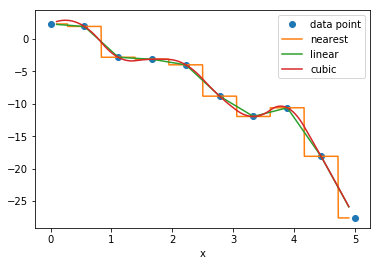

In [8]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

Curve fitting
-------------

We have already seen in [the numpy chapter](14-numpy.ipynb) that we can fit polynomial functions through a data set using the `numpy.polyfit` function. Here, we introduce a more generic curve fitting algorithm.

Scipy provides a somewhat generic function (based on the Levenburg-Marquardt algorithm )through `scipy.optimize.curve_fit` to fit a given (Python) function to a given data set. The assumption is that we have been given a set of data with points $x_1, x_2, …x_N$ and with corresponding function values $y_i$ and a dependence of $y_i$ on $x_i$ such that $y_i=f(x_i,\vec{p})$. We want to determine the parameter vector $\vec{p}=(p_1, p_2, \ldots,
p_k)$ so that $r$, the sum of the residuals, is as small as possible:

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

Curve fitting is of particular use if the data is noisy: for a given $x_i$ and $y_i=f(x_i,\vec{p})$ we have a (unknown) error term $\epsilon_i$ so that $y_i=f(x_i,\vec{p})+\epsilon_i$.

We use the following example to clarify this:
$$f(x,\vec{p}) = a \exp(-b x) + c, \quad\mathrm{i.e.}\quad \vec{p}=\mathtt{a,b,c}$$

Optimal parameters are a=2.43703, b=1.48592, and c=0.55979


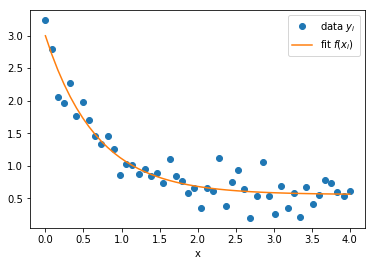

In [9]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
import pylab
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='data $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.legend()

Note that in the source code above we define the fitting function $y = f(x)$ through Python code. We can thus fit (nearly) arbitrary functions using the `curve_fit` method.

The `curve_fit` function returns a tuple `popt, pcov`. The first entry `popt` contains a tuple of the OPTimal Parameters (in the sense that these minimise equation (\[eq:1\]). The second entry contains the covariance matrix for all parameters. The diagonals provide the variance of the parameter estimations.

For the curve fitting process to work, the Levenburg-Marquardt algorithm needs to start the fitting process with initial guesses for the final parameters. If these are not specified (as in the example above), the value “1.0“ is used for the initial guess.

If the algorithm fails to fit a function to data (even though the function describes the data reasonably), we need to give the algorithm better estimates for the initial parameters. For the example shown above, we could give the estimates to the `curve_fit` function by changing the line

```python
popt, pcov = curve_fit(f, x, yi)
```

to

```python
popt, pcov = curve_fit(f, x, yi, p0=(2,1,0.6))
```

if our initial guesses would be *a* = 2, *b* = 1 and *c* = 0.6. Once we take the algorithm “roughly in the right area” in parameter space, the fitting usually works well.

Fourier transforms
------------------

In the next example, we create a signal as a superposition of a 50 Hz and 70 Hz sine wave (with a slight phase shift between them). We then Fourier transform the signal and plot the absolute value of the (complex) discrete Fourier transform coefficients against frequency, and expect to see peaks at 50Hz and 70Hz.

Text(0, 0.5, 'abs(DFT(signal))')

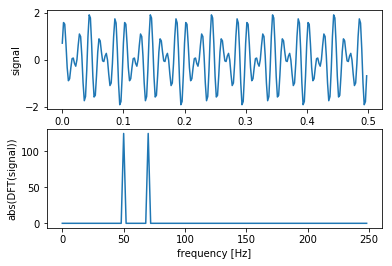

In [10]:
import scipy
import matplotlib.pyplot as plt
pi = scipy.pi

signal_length = 0.5   #[seconds]
sample_rate=500       #sampling rate [Hz]
dt = 1./sample_rate   #time between two samples [s]

df = 1/signal_length  #frequency between points in
                      #in frequency domain [Hz] 
t=scipy.arange(0,signal_length,dt) #the time vector
n_t=len(t)            #length of time vector

#create signal
y=scipy.sin(2*pi*50*t)+scipy.sin(2*pi*70*t+pi/4)

#compute fourier transform
f=scipy.fft(y)

#work out meaningful frequencies in fourier transform
freqs=df*scipy.arange(0,(n_t-1)/2.,dtype='d') #d=double precision float
n_freq=len(freqs)

#plot input data y against time
plt.subplot(2,1,1)
plt.plot(t,y,label='input data')
plt.xlabel('time [s]')
plt.ylabel('signal')

#plot frequency spectrum 
plt.subplot(2,1,2)
plt.plot(freqs,abs(f[0:n_freq]),
         label='abs(fourier transform)')
plt.xlabel('frequency [Hz]')
plt.ylabel('abs(DFT(signal))')

The lower plot shows the discrete Fourier transform computed from the data shown in the upper plot.

Optimisation
------------

Often we need to find the maximum or minimum of a particular function *f*(*x*) where *f* is a scalar function but *x* could be a vector. Typical applications are the minimisation of entities such as cost, risk and error, or the maximisation of productivity, efficiency and profit. Optimisation routines typically provide a method to minimise a given function: if we need to maximise *f*(*x*) we create a new function *g*(*x*) that reverses the sign of *f*, i.e. *g*(*x*)= − *f*(*x*) and we minimise *g*(*x*).

Below, we provide an example showing (i) the definition of the test function and (ii) the call of the `scipy.optimize.fmin` function which takes as argument a function *f* to minimise and an initial value *x*<sub>0</sub> from which to start the search for the minimum, and which returns the value of *x* for which *f*(*x*) is (locally) minimised. Typically, the search for the minimum is a local search, i.e. the algorithm follows the local gradient. We repeat the search for the minimum for two values (*x*<sub>0</sub> = 1.0 and *x*<sub>0</sub> = 2.0, respectively) to demonstrate that depending on the starting value we may find different minimar of the function *f*.

The majority of the commands (after the two calls to `fmin`) in the file `fmin1.py` creates the plot of the function, the start points for the searches and the minima obtained:

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


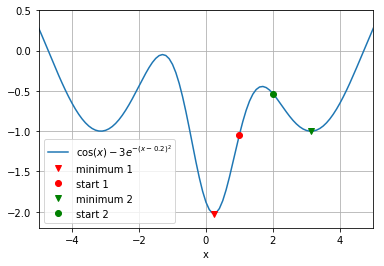

In [11]:
from scipy import arange, cos, exp
from scipy.optimize import fmin
import pylab

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function
x = arange(-10, 10, 0.1)
y = f(x)
pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# add minimum1 to plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimum 1')
# add start1 to plot
pylab.plot(1.0, f(1.0), 'or', label='start 1')

# add minimum2 to plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimum 2')
# add start2 to plot
pylab.plot(2.0,f(2.0),'og',label='start 2')

pylab.legend(loc='lower left')

Calling the `fmin` function will produce some diagnostic output, which you can also see above.

##### Return value of `fmin`

Note that the return value from the `fmin` function is a numpy `array` which – for the example above – contains only one number as we have only one parameter (here *x*) to vary. In general, `fmin` can be used to find the minimum in a higher-dimensional parameter space if there are several parameters. In that case, the numpy array would contain those parameters that minimise the objective function. The objective function $f(x)$ has to return a scalar even if there are more parameters, i.e. even if $x$ is a vector as in $f(\mathbf{x})$.

Other numerical methods
-----------------------

Scientific Python and Numpy provide access to a large number of other numerical algorithms including function interpolation, Fourier transforms, optimisation, special functions (such as Bessel functions), signal processing and filters, random number generation, and more. Start to explore `scipy`’s and `numpy`’s capabilities using the `help` function and the documentation provided on the web.

scipy.io: Scipy-input output
----------------------------

Scipy provides routines to read and write Matlab `mat` files. Here is an example where we create a Matlab compatible file storing a (1x11) matrix, and then read this data into a numpy array from Python using the scipy Input-Output library:

First we create a mat file in Octave (Octave is \[mostly\] compatible with Matlab):

```octave
octave:1> a=-1:0.5:4
a =
Columns 1 through 6:
   -1.0000   -0.5000    0.0000    0.5000    1.0000    1.5000    
Columns 7 through 11:
   2.0000    2.5000   3.0000    3.5000    4.0000
octave:2> save -6 octave_a.mat a       %save as version 6
```

Then we load this array within python:

In [12]:
from scipy.io import loadmat
mat_contents = loadmat('static/data/octave_a.mat')

In [13]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Aug  8 12:21:36 2016',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])}

In [14]:
mat_contents['a']

array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])

The function `loadmat` returns a dictionary: the key for each item in the dictionary is a string which is the name of that array when it was saved in Matlab. The key is the actual array.

A Matlab matrix file can hold several arrays. Each of those is presented by one key-value pair in the dictionary.

Let’s save two arrays from Python to demonstrate that:

In [15]:
import scipy.io
import numpy as np

# create two numpy arrays
a = np.linspace(0, 50, 11)
b = np.ones((4, 4))

# save as mat-file
# create dictionary for savemat
tmp_d = {'a': a,
         'b': b}
scipy.io.savemat('data.mat', tmp_d)

This program creates the file `data.mat`, which we can subsequently read using Matlab or here Octave:

    HAL47:code fangohr$ octave
    GNU Octave, version 3.2.4
    Copyright (C) 2009 John W. Eaton and others.
    <snip>

    octave:1> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           ans         1x11                        92  cell

    Total is 11 elements using 92 bytes

    octave:2> load data.mat
    octave:3> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           a          11x1                         88  double
           ans         1x11                        92  cell
           b           4x4                        128  double

    Total is 38 elements using 308 bytes

    octave:4> a
    a =

        0
        5
       10
       15
       20
       25
       30
       35
       40
       45
       50

    octave:5> b
    b =

       1   1   1   1
       1   1   1   1
       1   1   1   1
       1   1   1   1

Note that there are other functions to read from and write to in formats as used by IDL, Netcdf and other formats in `scipy.io`.

More → see [Scipy tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/io.html).